## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Understanding of Data

In [2]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv') 

In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


## 3. Data Cleaning

In [9]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop_duplicates(inplace=True)

In [22]:
def detect_outliers_zscore(data, threshold=3):
    # Convert non-numeric values to NaN
    data_numeric = data.apply(pd.to_numeric, errors='coerce')
    
    # Calculate z-scores
    z_scores = np.abs((data_numeric - data_numeric.mean()) / data_numeric.std())
    
    # Identify outliers
    outliers = data[z_scores > threshold].dropna(how='all')
    
    # Calculate total number of outliers
    total_outliers = outliers.shape[0]
    
    return outliers, total_outliers

outliers_zscore, total_outliers_zscore = detect_outliers_zscore(data)
print("Total outliers detected using z-score method:", total_outliers_zscore)


Total outliers detected using z-score method: 0


In [19]:
def detect_outliers_iqr(data, threshold=1.5):
    # Convert non-numeric values to NaN
    data_numeric = data.apply(pd.to_numeric, errors='coerce')
    
    # Calculate quartiles
    q1 = data_numeric.quantile(0.25)
    q3 = data_numeric.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Identify outliers
    outliers = data[(data_numeric < lower_bound) | (data_numeric > upper_bound)].dropna(how='all')
    
    # Calculate total number of outliers
    total_outliers = outliers.shape[0]
    
    return outliers, total_outliers

outliers_iqr, total_outliers_iqr = detect_outliers_iqr(data)
print("Total outliers detected using IQR method:", total_outliers_iqr)


Total outliers detected using IQR method: 0


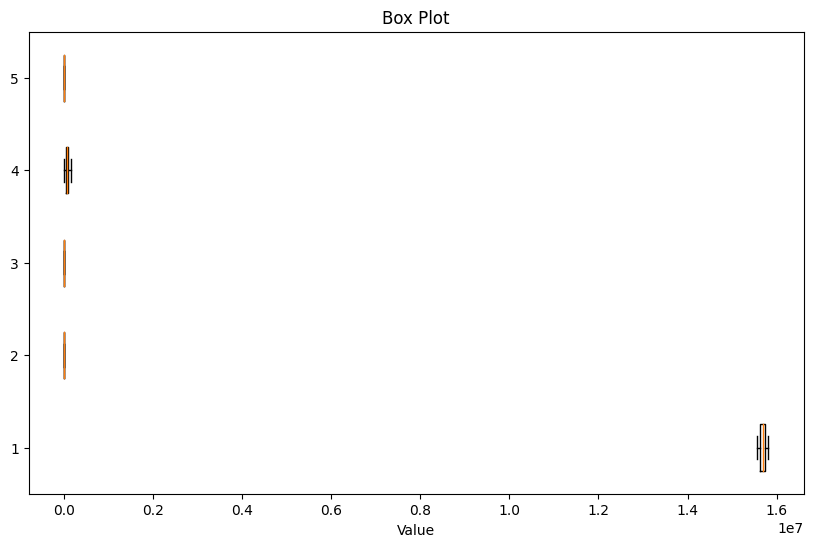

ValueError: x and y must be the same size

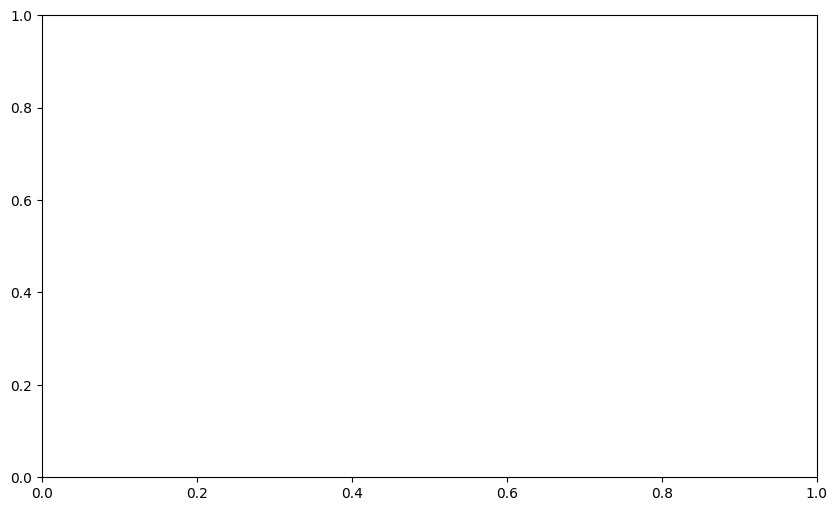

In [20]:
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title("Box Plot")
plt.xlabel("Value")
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data)
plt.title("Scatter Plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## 4. Data Transformation

In [15]:
# Define custom mapping
custom_mapping = {
    'Female': 1,
    'Male': 0,
    'NaN': float('nan')  # Explicitly handle 'NaN' string if necessary
}

# Replace non-numeric strings using the custom mapping
data['Gender'] = data['Gender'].replace(custom_mapping)

# Convert the 'value' column to float, coercing errors to NaN
#data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Print after transformation
print("After Transformation:")
print(data)

After Transformation:
      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       0   19            19000          0
1    15810944       0   35            20000          0
2    15668575       1   26            43000          0
3    15603246       1   27            57000          0
4    15804002       0   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       1   46            41000          1
396  15706071       0   51            23000          1
397  15654296       1   50            20000          1
398  15755018       0   36            33000          0
399  15594041       1   49            36000          1

[400 rows x 5 columns]


## 5. Descriptive Statistics

In [23]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


## 6. Data Visualization

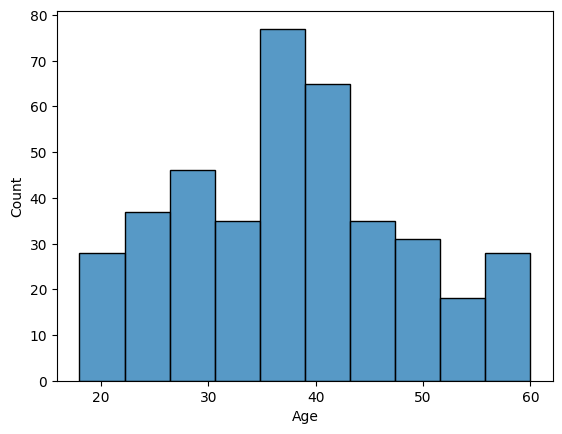

In [24]:
sns.histplot(data['Age'])
plt.show()

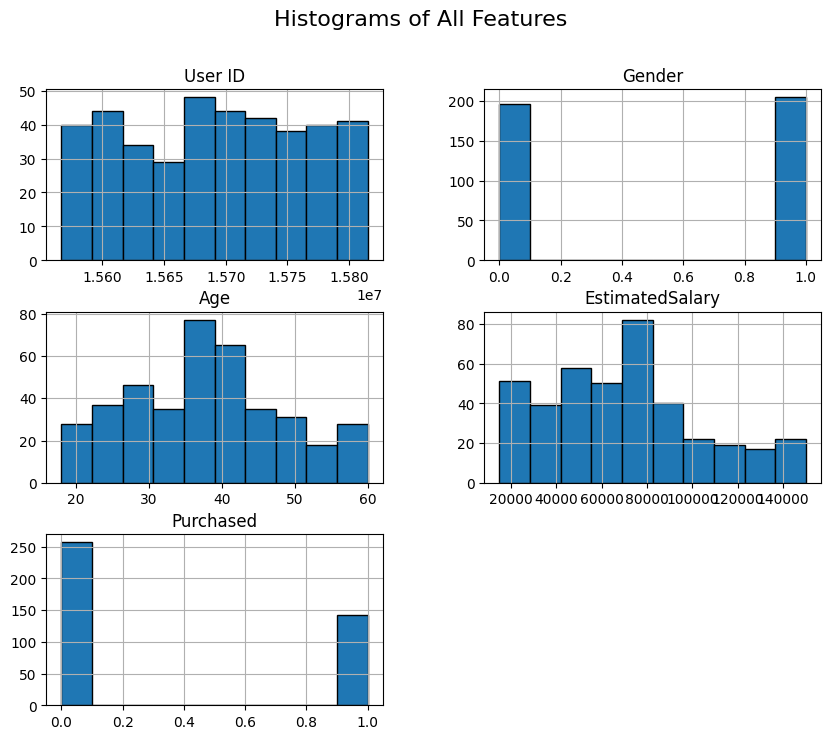

In [25]:
#import matplotlib.pyplot as plt

# Function to plot histograms for all features in the DataFrame
def plot_histograms(df):
    df.hist(figsize=(10, 8), bins=10, edgecolor='black')
    plt.suptitle('Histograms of All Features', fontsize=16)
    plt.show()

# Plotting histograms
plot_histograms(data)

<Axes: ylabel='Age'>

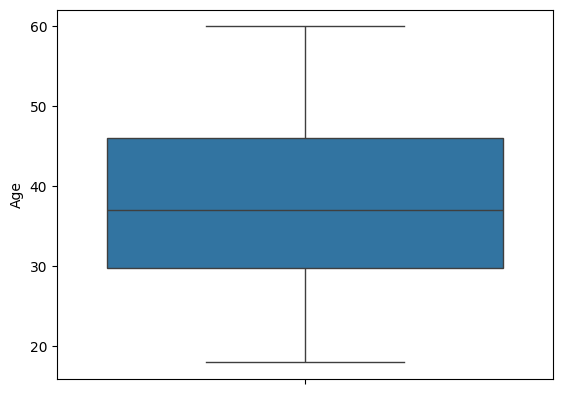

In [26]:
sns.boxplot(data['Age'])

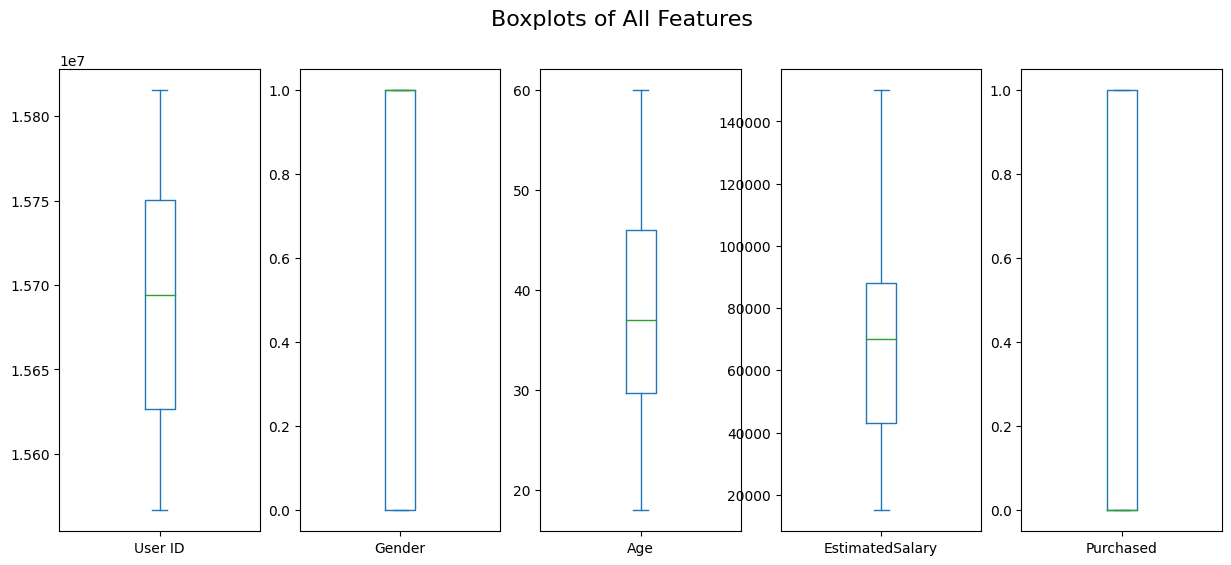

In [27]:
# Function to plot boxplots for all features in the DataFrame
def plot_boxplots(df):
    # Create a subplot for each feature
    df.plot(kind='box', subplots=True, layout=(1, len(df.columns)), figsize=(15, 6), sharex=False, sharey=False)
    plt.suptitle('Boxplots of All Features', fontsize=16)
    plt.show()

# Plotting boxplots
plot_boxplots(data)

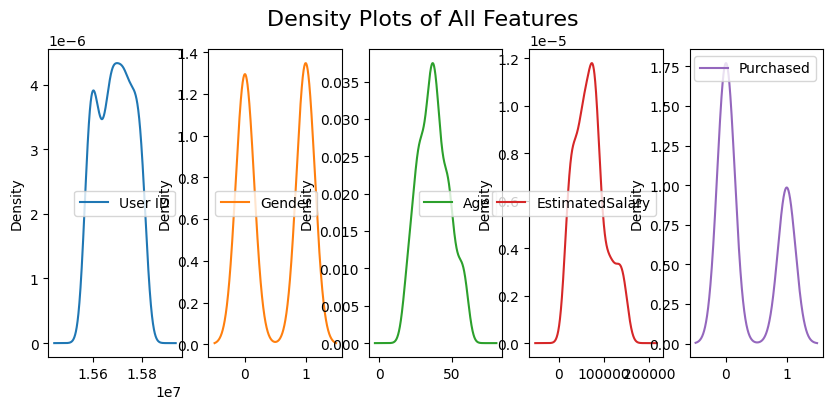

In [28]:
# Function to plot density plots for all features in the DataFrame
def plot_density_plots(df):
    df_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
    df_numeric.plot(kind='density', subplots=True, layout=(1,len(df_numeric.columns)), figsize=(10, 4), sharex=False)
    plt.suptitle('Density Plots of All Features', fontsize=16)
    plt.show()

# Plotting density plots
plot_density_plots(data)

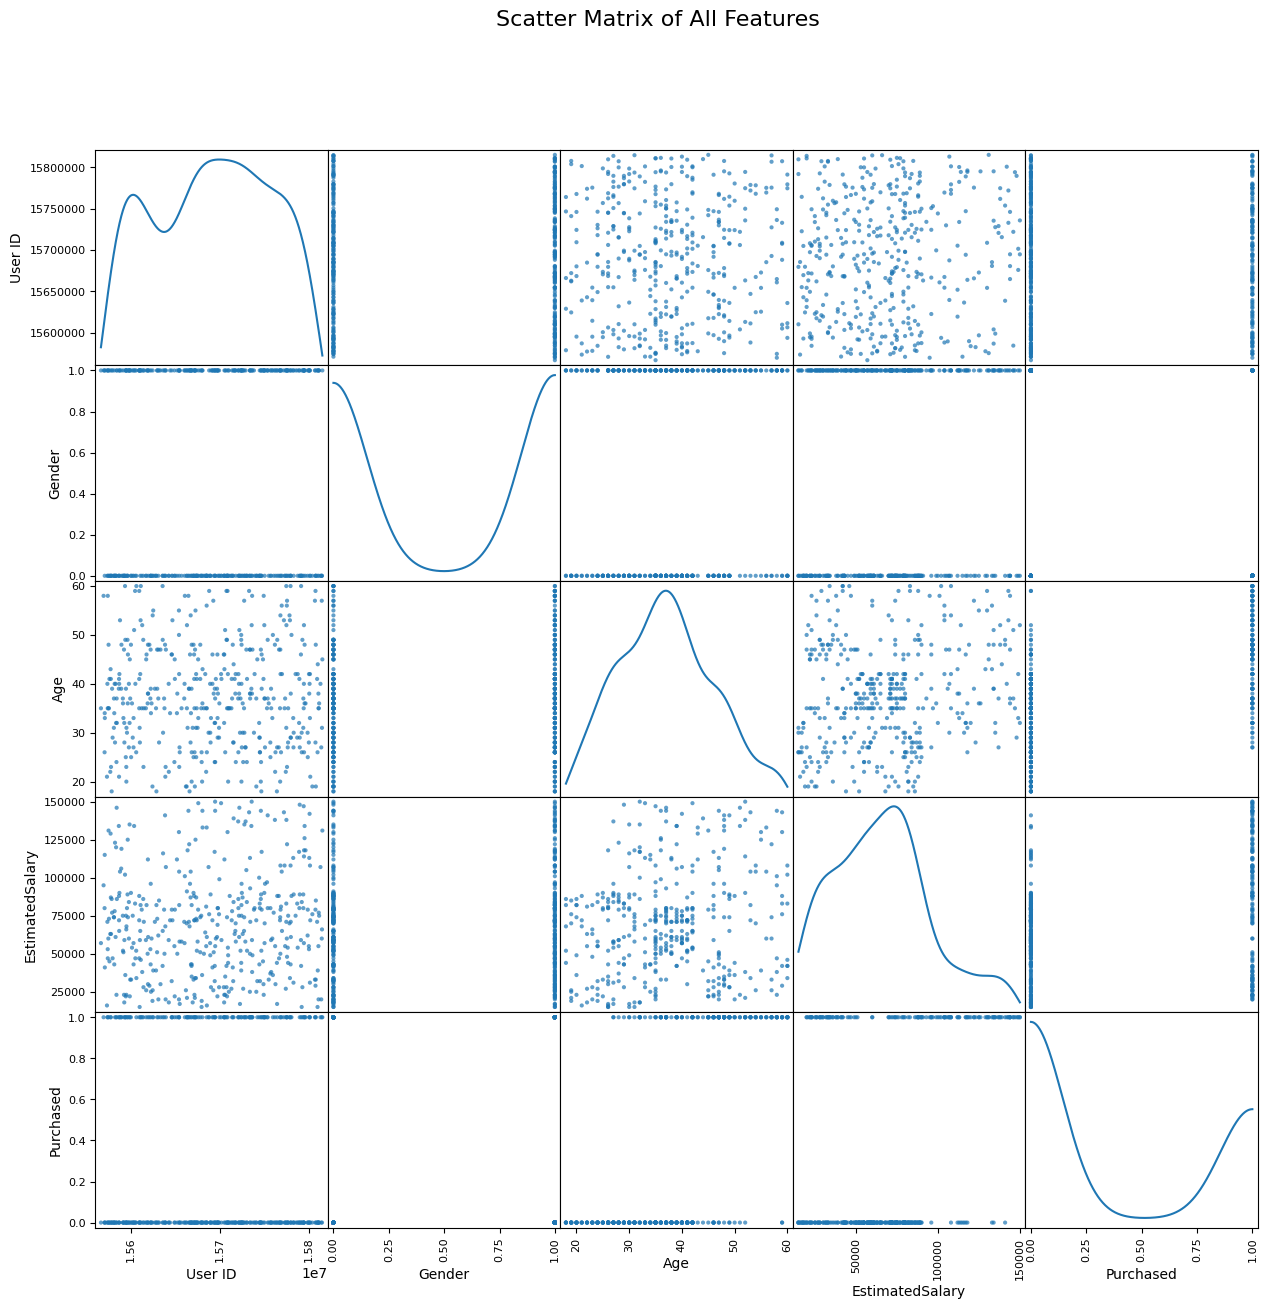

In [29]:
from pandas.plotting import scatter_matrix

# Function to plot scatter plots for all pairs of features
def plot_scatter_matrix(df):
    scatter_matrix(df, figsize=(15, 14), diagonal='kde', alpha=0.7)
    plt.suptitle('Scatter Matrix of All Features', fontsize=16)
    plt.show()

# Plotting scatter plots
plot_scatter_matrix(data)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

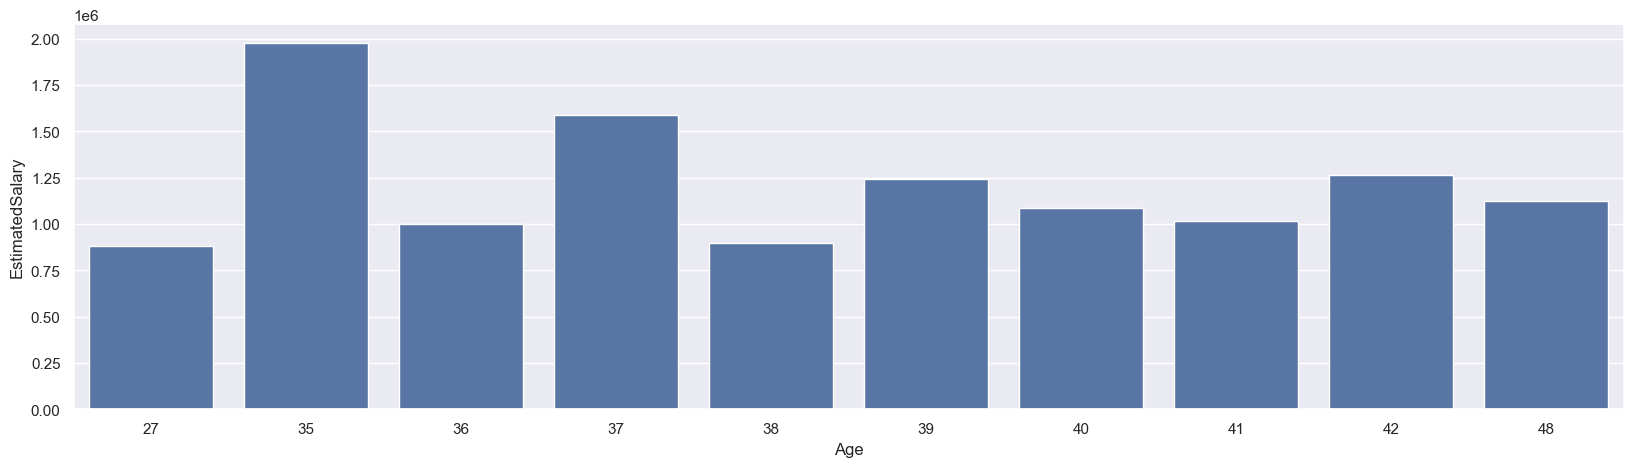

In [30]:
salary_state = data.groupby(['Age'], as_index=False)['EstimatedSalary'].sum().sort_values(by='EstimatedSalary', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = salary_state, x = 'Age',y= 'EstimatedSalary')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

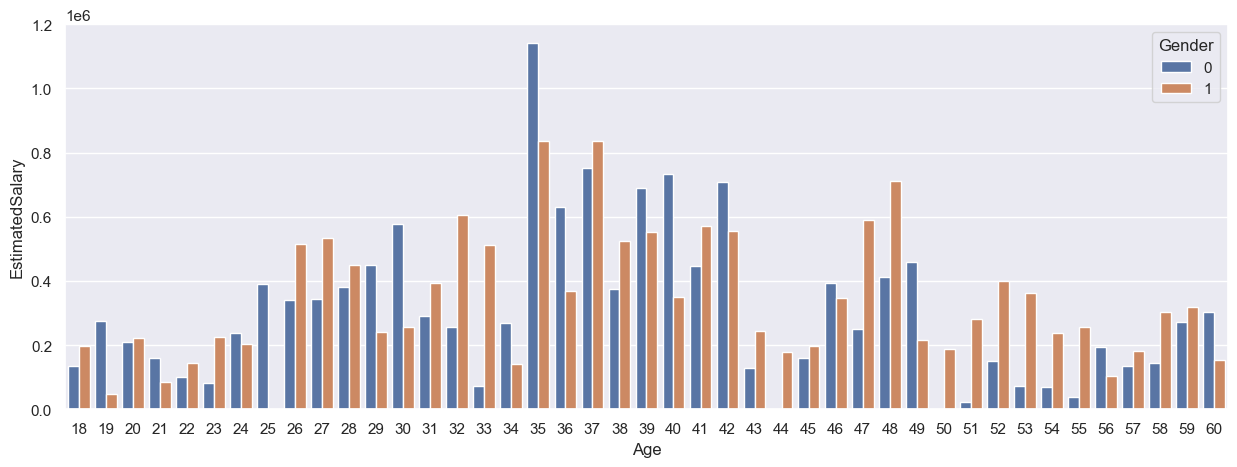

In [31]:
salary_state = data.groupby(['Age', 'Gender'], as_index=False)['EstimatedSalary'].sum().sort_values(by='EstimatedSalary', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = salary_state, x = 'Age',y= 'EstimatedSalary', hue='Gender')

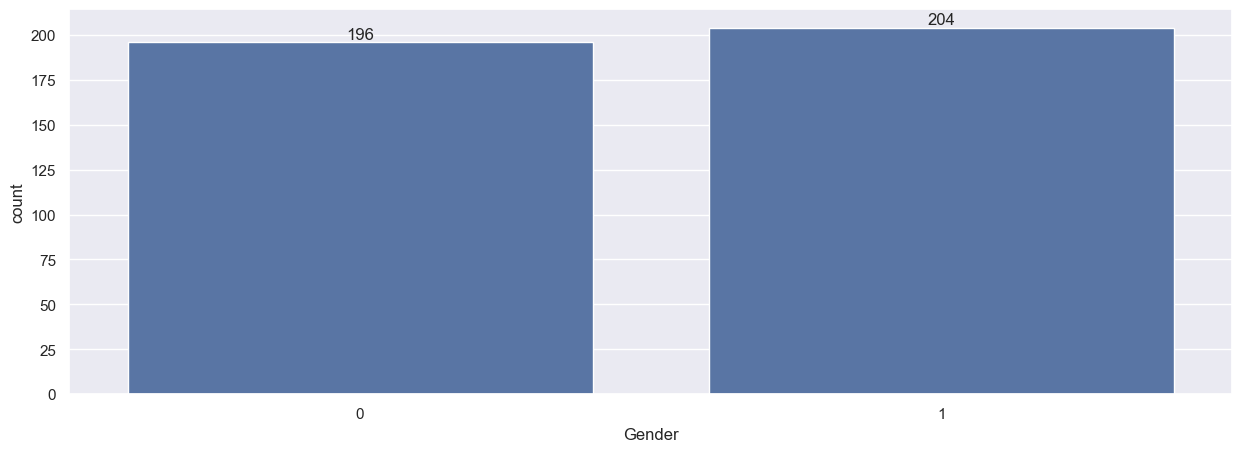

In [32]:
ax = sns.countplot(data, x = 'Gender')

sns.set(rc={'figure.figsize':(1,2)})
for bars in ax.containers:
    ax.bar_label(bars)

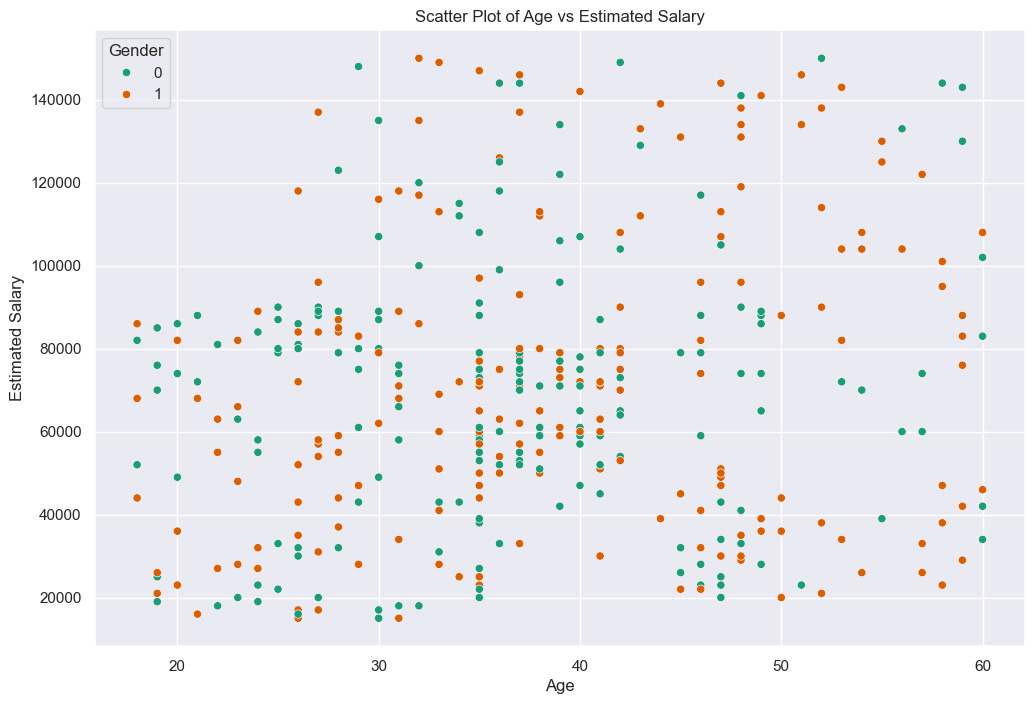

In [33]:
# Plot a Scatter plot
#sns.scatterplot(data,x='Age',y='EstimatedSalary')
#plt.figure(figsize=(25,25))

# Scatter plot with custom size and color
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.scatterplot(data, x='Age', y='EstimatedSalary', 
                hue='Gender',  # Optional: Use this to color by gender
                palette='Dark2',  # Choose a color palette
                sizes=(25, 80),  # Adjust the range of point sizes
                legend='full')  # Display legend

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot of Age vs Estimated Salary')
plt.show()

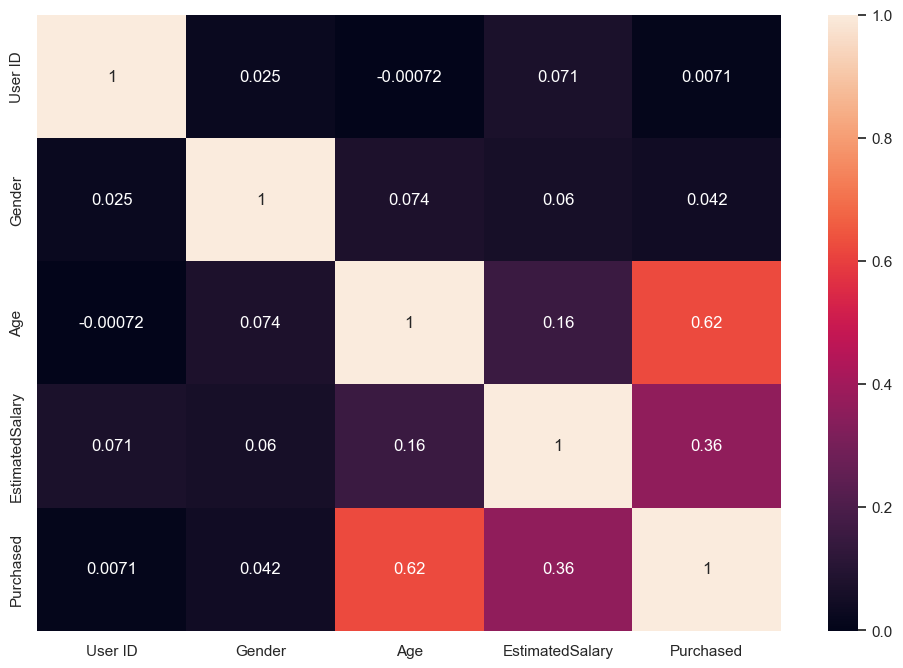

<Figure size 5000x2500 with 0 Axes>

In [41]:
# Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Modeling

In [30]:
from sklearn.model_selection import train_test_split

### Data Spliting

In [31]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [32]:
X = data[['Age','EstimatedSalary']]
y = data['Purchased']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

### Training the Model

In [36]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# Predictions on the training set
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.996875


In [41]:
# Predictions on the testing set
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {test_accuracy}')

Testing Accuracy: 0.9


In [42]:
# Check if the model is overfit or underfit
if train_accuracy > test_accuracy:
 print('The model may be overfitting the training data.')
elif train_accuracy < test_accuracy:
 print('The model may be underfitting the training data.')
else:
 print('The model seems to be well-fitted to the training data.')

The model may be overfitting the training data.


In [43]:
predict = rf_model.predict(X_test)
predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[46,  6],
       [ 2, 26]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



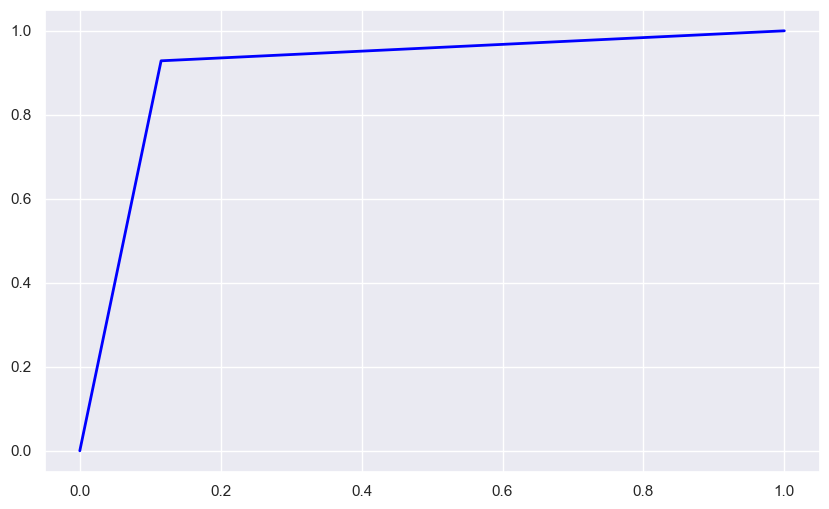

In [49]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()